In [90]:
!pip install --quiet wbgapi pandas plotly folium networkx

In [91]:
import wbgapi as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [92]:
indicators = {
    'NY.GDP.PCAP.CD': 'GDP_Per_Capita',
    'SP.DYN.LE00.IN': 'Life_Expectancy',
    'IT.NET.USER.ZS': 'Internet_Users_Pct',
    'SP.POP.TOTL': 'Population'
}


start_year = 1980
end_year = 2024

skip_aggregates = True

In [93]:
df_raw = wb.data.DataFrame(
    list(indicators.keys()),
    economy = 'all',
    time = range(start_year, end_year + 1),
    labels = True,
    skipAggs = skip_aggregates
).reset_index()


df_raw.head()

,economy,series,Country,Series,YR1980,YR1981,YR1982,YR1983,YR1984,YR1985,YR1986,YR1987,YR1988,YR1989,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
0,ZWE,NY.GDP.PCAP.CD,Zimbabwe,GDP per capita (current US$),948.527387,1068.377704,1095.325565,958.715770,756.972591,648.944527,692.175921,726.060756,815.476163,839.989158,866.486527,830.527171,630.819582,604.386719,633.733262,647.975500,766.523691,750.193674,552.165320,582.003488,562.556946,566.107692,524.677281,468.234223,469.484691,461.028318,430.809214,413.302605,340.740210,735.446249,901.550518,1037.246137,1238.594795,1362.299529,1372.214746,1386.418559,1407.420964,3448.086991,2271.852504,1683.913136,1730.453910,1724.387271,2040.546587,2156.034093,2656.409377
1,ZMB,NY.GDP.PCAP.CD,Zambia,GDP per capita (current US$),669.419722,669.886829,626.532533,520.455834,413.269974,332.173737,238.233796,314.999603,504.486020,526.361769,422.336299,423.071257,389.254666,390.916674,426.386598,433.312783,399.511305,465.871942,373.084763,349.515723,359.429501,396.548953,393.864626,446.290105,548.685975,710.982068,1051.717149,1118.731626,1375.502110,1136.241683,1451.106160,1624.868178,1710.050613,1820.718548,1707.485731,1295.877887,1239.085279,1483.465773,1463.899979,1258.986198,951.644317,1127.160779,1447.123101,1330.727806,1235.084665
2,YEM,NY.GDP.PCAP.CD,"Yemen, Rep.",GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910.422466,1016.302230,1198.130317,1396.615444,1735.044195,764.414656,375.214995,382.584929,342.739407,401.448142,493.235183,487.141258,513.241487,548.905883,627.632023,734.159908,809.713128,890.305768,1071.635833,969.243510,1155.203053,1186.475006,1245.050683,1378.750030,1430.164210,1362.173812,975.359417,811.165970,633.887202,NaN,NaN,NaN,NaN,NaN,NaN
3,PSE,NY.GDP.PCAP.CD,West Bank and Gaza,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1201.581542,1326.562857,1317.466751,1389.164971,1465.046057,1499.492177,1476.171850,1335.553195,1156.217473,1257.698570,1422.190886,1543.701414,1570.104400,1664.245717,2035.202341,2191.781787,2557.075624,2880.798437,3067.438727,3315.297539,3352.112595,3272.154324,3527.613824,3620.360487,3562.330943,3656.858271,3233.568638,3678.635657,3799.955270,3455.028529,2592.305912
4,VIR,NY.GDP.PCAP.CD,Virgin Islands (U.S.),GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30062.022505,31731.256624,35006.361440,40828.746093,41377.146601,44158.505404,39152.375066,38753.182539,39905.128418,38997.137316,37795.319259,34597.976694,33045.364380,34007.352941,35324.974887,35365.069304,36663.208755,38633.529892,39787.374165,42571.077737,44320.909186,NaN,NaN


In [94]:
year_cols = [col for col in df_raw.columns if col.startswith('YR')]
melted = df_raw.melt(
    id_vars=['economy', 'series', 'Country', 'Series'],
    value_vars=year_cols,
    var_name='YearRaw',
    value_name='Value'
)

melted['Year'] = melted['YearRaw'].str.replace('YR', '').astype(int)

melted = melted.rename(columns={'Country': 'CountryName', 'economy': 'CountryCode', 'series': 'SeriesCode', 'Series': 'SeriesLabel'})

melted[['CountryCode','CountryName','SeriesCode','SeriesLabel','Year','Value']].head(8)

,CountryCode,CountryName,SeriesCode,SeriesLabel,Year,Value
0,ZWE,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),1980,948.527387
1,ZMB,Zambia,NY.GDP.PCAP.CD,GDP per capita (current US$),1980,669.419722
2,YEM,"Yemen, Rep.",NY.GDP.PCAP.CD,GDP per capita (current US$),1980,NaN
3,PSE,West Bank and Gaza,NY.GDP.PCAP.CD,GDP per capita (current US$),1980,NaN
4,VIR,Virgin Islands (U.S.),NY.GDP.PCAP.CD,GDP per capita (current US$),1980,NaN
5,VNM,Viet Nam,NY.GDP.PCAP.CD,GDP per capita (current US$),1980,NaN
6,VEN,"Venezuela, RB",NY.GDP.PCAP.CD,GDP per capita (current US$),1980,3874.404706
7,VUT,Vanuatu,NY.GDP.PCAP.CD,GDP per capita (current US$),1980,1047.773626


In [95]:
df_pivot = melted.pivot_table(index=['CountryCode', 'CountryName', 'Year'],
                            columns='SeriesCode',
                            values='Value').reset_index()
df_pivot = df_pivot.rename(columns=indicators)

df_pivot = df_pivot.dropna(subset=list(indicators.values()))

year = 2022
df_year = df_pivot[df_pivot['Year'] == year]

top_gdp = df_year.sort_values('GDP_Per_Capita', ascending=False).head(10)
top_life = df_year.sort_values('Life_Expectancy', ascending=False).head(10)

fig1 = px.bar(top_gdp, x='GDP_Per_Capita', y='CountryName', orientation='h',
              title=f'Top 10 Countries by GDP per Capita ({year})',
              labels={'GDP_Per_Capita':'GDP per Capita (USD)'})
fig1.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_white')
fig1.show()

fig2 = px.bar(top_life, x='Life_Expectancy', y='CountryName', orientation='h',
              title=f'Top 10 Countries by Life Expectancy ({year})',
              labels={'Life_Expectancy':'Life Expectancy (Years)'})
fig2.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_white')
fig2.show()

In [96]:
df_scatter = df_pivot[df_pivot['Year'] == year]

fig = px.scatter(df_scatter, x='GDP_Per_Capita', y='Life_Expectancy',
                 size='Population', color='Internet_Users_Pct',
                 hover_name='CountryName', size_max=60,
                 title=f'GDP vs Life Expectancy ({year}) — bubble size = Population, color = Internet Users %',
                 labels={'GDP_Per_Capita':'GDP per Capita', 'Life_Expectancy':'Life Expectancy', 'Internet_Users_Pct':'Internet Users %'})
fig.update_layout(template='plotly_white', xaxis_type='log')
fig.show()

In [97]:
df_plot = df_pivot[df_pivot['Year'] == 2022].dropna(subset=['GDP_Per_Capita','Life_Expectancy','Population'])

fig_scatter = px.scatter(df_plot,
                         x='GDP_Per_Capita', y='Life_Expectancy',
                         hover_name='CountryName',
                         title='Standard Scatter: GDP vs Life Expectancy (2022)',
                         labels={'GDP_Per_Capita':'GDP per Capita', 'Life_Expectancy':'Life Expectancy'})
fig_scatter.update_xaxes(type='log')
fig_scatter.update_traces(marker=dict(size=8, opacity=0.7))
fig_scatter.update_layout(template='plotly_white')
fig_scatter.show()

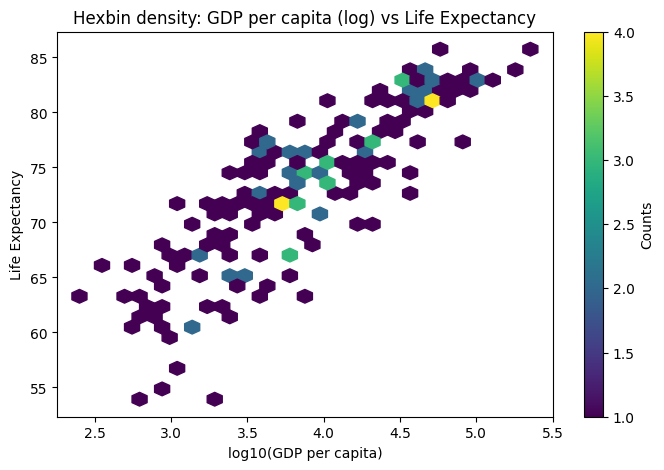

In [98]:
plt.figure(figsize=(8,5))
plt.hexbin(np.log10(df_year['GDP_Per_Capita']), df_year['Life_Expectancy'], gridsize=30, mincnt=1)
cb = plt.colorbar()
cb.set_label('Counts')
plt.xlabel('log10(GDP per capita)')
plt.ylabel('Life Expectancy')
plt.title('Hexbin density: GDP per capita (log) vs Life Expectancy')
plt.show()

## **الإجابة:**

Scatter هو الافضل

**وضوح العلاقة :**

 الرسم النقطي يبيّن مباشرة علاقة زوج المتغيرين (GDP_per_capita vs Life_Expectancy) بدون تشتيت؛ يسهل رؤية الانحدار، الانحرافات، والقيم الشاذة.

**تجنّب التباس الحجم:**

 في مخطط الفقاعات تباين أحجام الفقاعات قد يفرض تأويلات خاطئة — مثلاً اختلاف مقياس الحجم أو تغطّي فقاعات صغيرة بواسطة كبيرة يجعل قراءة الأنماط أقل موثوقية.

** عدم الحاجة للبعد الثالث:**

  إذا هدف التحليل الأساسي هو إظهار الارتباط الثنائي أو مقارنة انتشار القيم عبر الدول فإن إضافة بعد ثالث (مثل Population) قد يزيد الضوضاء البصرية بلا فائدة تفسيرية

In [99]:
numeric_cols = ['GDP_Per_Capita', 'Life_Expectancy', 'Internet_Users_Pct', 'Population']
corr = df_pivot[numeric_cols].dropna().corr()

fig = px.imshow(corr, text_auto='.2f',
                x=corr.columns, y=corr.columns,
                title='Correlation Matrix (all years combined)')
fig.update_layout(template='plotly_white')
fig.show()


In [100]:
numeric_cols = ['GDP_Per_Capita','Life_Expectancy','Internet_Users_Pct','Population']
corr_df = df_year[numeric_cols].corr(method='pearson')

fig_corr = px.imshow(corr_df,
                     text_auto='.2f',
                     x=corr_df.columns, y=corr_df.columns,
                     title=f'Pearson Correlation Matrix ({year})')
fig_corr.update_layout(template='plotly_white')
fig_corr.show()

# **Internet_Users_Pct ↔ Life_Expectancy**

زيادة الوصول للإنترنت تسهّل نشر المعلومات الصحية، الوعي بالوقاية، الإرشادات الطبية.

في بلدان كثيرة، الإنترنت يمكّن خدمات الرعاية عن بُعد، حجز مواعيد أسرع، واستخدام منصات الصحة العامة، ما يحسن إدارة الأمراض المزمنة ويقلل زمن الوصول للعلاج.

# **GDP_Per_Capita ↔ Life_Expectancy:**
 عادة ارتباط إيجابي متوسط : دخل أعلى يسمح بنظم رعاية صحية أفضل، تغذية، بنية تحتية.

# **GDP_Per_Capita ↔ Internet_Users_Pct**

غالبًا علاقة متوسطة لأن ارتفاع دخل الفرد يرتبط بسرعة تبنّي الإنترنت.

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_cluster = df_pivot[df_pivot['Year'] == year].dropna(subset=['GDP_Per_Capita','Life_Expectancy','Internet_Users_Pct']).copy()

features = ['GDP_Per_Capita','Life_Expectancy','Internet_Users_Pct']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled).astype(str)  # cast to str for categorical coloring

fig = px.scatter(df_cluster, x='GDP_Per_Capita', y='Life_Expectancy',
                 color='Cluster', size='Population', hover_name='CountryName',
                 title=f'KMeans Clusters of Countries ({year})',
                 labels={'GDP_Per_Capita':'GDP per Capita','Life_Expectancy':'Life Expectancy'})
fig.update_layout(template='plotly_white', xaxis_type='log')
fig.show()

In [102]:
df_2022 = df_pivot[df_pivot['Year'] == 2022]
fig = px.choropleth(df_2022,
                    locations='CountryName',
                    locationmode='country names',
                    color='Life_Expectancy',
                    hover_name='CountryName',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Life Expectancy Across Countries (2022)')
fig.show()

In [103]:
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import plotly.graph_objects as go

df_net = df_cluster.reset_index(drop=True)
X = df_net[['GDP_Per_Capita','Life_Expectancy']].values
dist = euclidean_distances(X)

G = nx.Graph()
for i, c in df_net['CountryName'].items():
    G.add_node(i, name=c)

k = 3
for i in range(len(df_net)):
    neighbors = dist[i].argsort()[1:k+1]
    for j in neighbors:
        G.add_edge(i, j, weight=float(dist[i, j]))

pos = nx.spring_layout(G, k=0.5, seed=42)

node_x = []
node_y = []
node_text = []
for n in G.nodes():
    x, y = pos[n]
    node_x.append(x)
    node_y.append(y)
    node_text.append(df_net.loc[n, 'CountryName'])

edge_x = []
edge_y = []
for e in G.edges():
    x0, y0 = pos[e[0]]
    x1, y1 = pos[e[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(x=edge_x, y=edge_y,
                        mode='lines',
                        hoverinfo='none',
                        line=dict(width=0.5, color='#888'))

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text',
                        text=node_text, textposition='top center',
                        hoverinfo='text',
                        marker=dict(size=10, color='skyblue'))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title=f'Country Similarity Network ({year})',
                                 showlegend=False,
                                 hovermode='closest'))
fig.update_layout(template='plotly_white')
fig.show()

In [104]:
!pip install folium wbgapi country_converter pandas

In [105]:
!pip install country_converter

In [106]:
import folium
import wbgapi as wb
import country_converter as coco
import pandas as pd
import numpy as np

latest_year = df_pivot['Year'].max()
df_latest = df_pivot[df_pivot['Year'] == latest_year].dropna(subset=['Life_Expectancy'])

df_latest['iso3'] = df_latest['CountryName'].apply(lambda x: coco.convert(names=x, to='ISO3'))

coords = {}
for econ in wb.economy.list():
    if 'latitude' in econ and 'longitude' in econ:
        try:
            lat = float(econ['latitude'])
            lon = float(econ['longitude'])
            iso3 = econ['id']
            if lat is not None and lon is not None:
                coords[iso3] = (lat, lon, econ['value'])
        except (ValueError, TypeError):
            pass

m = folium.Map(location=[20, 0], zoom_start=2)

for iso3, (lat, lon, country_name) in coords.items():
    if iso3 in df_latest['iso3'].values:
        country_data = df_latest[df_latest['iso3'] == iso3].iloc[0]
        life_exp = country_data['Life_Expectancy']

        if life_exp > 75:
            color = 'green'
        elif life_exp > 65:
            color = 'yellow'
        else:
            color = 'red'

        folium.CircleMarker(
            location=[lat, lon],
            radius=life_exp/10,  # حجم الدائرة يتناسب مع متوسط العمر
            popup=f"{country_name}: {life_exp:.1f} years",
            tooltip=f"{country_name}: {life_exp:.1f} years",
            color=color,
            fill=True,
            fill_opacity=0.6
        ).add_to(m)

m.save('life_expectancy_map.html')
m

In [107]:
countries = ['China','Tunisia','Algeria']
ts = df_pivot[df_pivot['CountryName'].isin(countries)].dropna(subset=['GDP_Per_Capita'])
fig = px.line(ts, x='Year', y='GDP_Per_Capita', color='CountryName',
              title='GDP per capita over time (interactive)')
fig.update_traces(mode='lines+markers')
fig.update_layout(hovermode='x unified')
fig.show()

In [111]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

region_map = {"Africa": ["Algeria", "Tunisia"], "Europe": ["Spain", "France"], "Asia": ["China", "Qatar"]}

G = nx.DiGraph()
G.add_node('World', level=0)
df_nodes = df_year.set_index('CountryName')

for region, countries in region_map.items():
    G.add_node(region, level=1)
    G.add_edge('World', region)
    for country in countries:
        if country in df_nodes.index:
            G.add_node(country, level=2, **df_nodes.loc[country][['Population', 'GDP_Per_Capita']].to_dict())
            G.add_edge(region, country)

pos = nx.spring_layout(G, seed=42)


edge_x, edge_y = [], []
for u, v in G.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(x=edge_x, y=edge_y, mode='lines',
                        line=dict(width=1, color='#888'), hoverinfo='none')

node_x, node_y, text, hovertext, sizes, colors = [], [], [], [], [], []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    text.append(node)

    if node == 'World':
        hovertext.append("World")
        sizes.append(40)
        colors.append('gold')
    elif node in region_map:
        hovertext.append(f"{node} (Region)")
        sizes.append(30)
        colors.append('lightblue')
    else:
        pop = G.nodes[node].get('Population', 1)
        gdp = G.nodes[node].get('GDP_Per_Capita', 0)
        hovertext.append(f"{node}<br>Population: {int(pop):,}<br>GDP: {gdp:,.0f}")
        sizes.append(6 + np.log1p(pop) / 1.2)
        colors.append('salmon')

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text',
                        text=text, textposition='bottom center',
                        hovertext=hovertext, hoverinfo='text',
                        marker=dict(size=sizes, color=colors,
                                  line=dict(width=1, color='black')))

fig_net = go.Figure(data=[edge_trace, node_trace],
                   layout=go.Layout(title=f'World → Regions → Countries ({year})',
                                   showlegend=False, hovermode='closest',
                                   template='plotly_white'))
fig_net.show()

# **Modeling Economic Relationships with NetworkX:**

Trade Networks - Nodes: countries, Edges: trade flows (exports/imports)
Financial Networks - Nodes: banks/institutions, Edges: interbank loans/transactions
Supply Chains - Nodes: companies/industries, Edges: supplier-customer relationships
Investment Networks - Nodes: countries/companies, Edges: FDI flows/ownership stakes

# **Required External Data:**

Bilateral trade data (UN Comtrade, WTO)

Financial transactions (BIS, central banks)

Corporate ownership data (Orbis, corporate registries)

**Network analysis can reveal systemic risk, dependency patterns, and shock propagation through these economic networks.**